In [2]:
#importing Basic libraries
import pandas as pd 
import numpy as np 

#NLTK libraries
import nltk
import re
import string
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer


# Machine Learning libraries
import sklearn 
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn import svm, datasets
from sklearn import preprocessing 



#Metrics libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc


#Visualization libraries
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
%matplotlib inline



#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Other miscellaneous libraries
from scipy import interp
from itertools import cycle

from collections import defaultdict
from collections import Counter


In [3]:
pip install -U textblob


Note: you may need to restart the kernel to use updated packages.


In [4]:
from textblob import TextBlob

In [5]:
raw_reviews = pd.read_csv('Desktop/Musical_instruments_reviews.csv')
raw_reviews

reviewerID        asin  \
0      A2IBPI20UZIR0U  1384719342   
1      A14VAT5EAX3D9S  1384719342   
2      A195EZSQDW3E21  1384719342   
3      A2C00NNG1ZQQG2  1384719342   
4       A94QU4C90B1AX  1384719342   
...               ...         ...   
10256  A14B2YH83ZXMPP  B00JBIVXGC   
10257   A1RPTVW5VEOSI  B00JBIVXGC   
10258   AWCJ12KBO5VII  B00JBIVXGC   
10259  A2Z7S8B5U4PAKJ  B00JBIVXGC   
10260  A2WA8TDCTGUADI  B00JBIVXGC   

                                           reviewerName   helpful  \
0      cassandra tu "Yeah, well, that's just like, u...    [0, 0]   
1                                                  Jake  [13, 14]   
2                         Rick Bennette "Rick Bennette"    [1, 1]   
3                             RustyBill "Sunday Rocker"    [0, 0]   
4                                         SEAN MASLANKA    [0, 0]   
...                                                 ...       ...   
10256                                   Lonnie M. Adams    [0, 0]   
10257                                Michael J. Edelman    [0, 0]   
10258                                  Michael L. Knapp    [0, 0]   
10259                           Rick Langdon "Scriptor"    [0, 0]   
10260                                   TheTerrorBeyond    [0, 0]   

                                              reviewText  overall  \
0      Not much to write about here, but it does exac...      5.0   
1      The product does exactly as it should and is q...      5.0   
2      The primary job of this device is to block the...      5.0   
3      Nice windscreen protects my MXL mic and preven...      5.0   
4      This pop filter is great. It looks and perform...      5.0   
...                                                  ...      ...   
10256            Great, just as expected.  Thank to all.      5.0   
10257  I've been thinking about trying the Nanoweb st...      5.0   
10258  I have tried coated strings in the past ( incl...      4.0   
10259  Well, MADE by Elixir and DEVELOPED with Taylor...      4.0   
10260  These strings are really quite good, but I wou...      4.0   

                                                 summary  unixReviewTime  \
0                                                   good      1393545600   
1                                                   Jake      1363392000   
2                                   It Does The Job Well      1377648000   
3                          GOOD WINDSCREEN FOR THE MONEY      1392336000   
4                  No more pops when I record my vocals.      1392940800   
...                                                  ...             ...   
10256                                         Five Stars      1405814400   
10257  Long life, and for some players, a good econom...      1404259200   
10258                                   Good for coated.      1405987200   
10259                                        Taylor Made      1404172800   
10260  These strings are really quite good, but I wou...      1405468800   

        reviewTime  
0      02 28, 2014  
1      03 16, 2013  
2      08 28, 2013  
3      02 14, 2014  
4      02 21, 2014  
...            ...  
10256  07 20, 2014  
10257   07 2, 2014  
10258  07 22, 2014  
10259   07 1, 2014  
10260  07 16, 2014  

[10261 rows x 9 columns]

In [6]:
 raw_reviews.shape

(10261, 9)

In [7]:
raw_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      10261 non-null  object 
 1   asin            10261 non-null  object 
 2   reviewerName    10234 non-null  object 
 3   helpful         10261 non-null  object 
 4   reviewText      10254 non-null  object 
 5   overall         10261 non-null  float64
 6   summary         10261 non-null  object 
 7   unixReviewTime  10261 non-null  int64  
 8   reviewTime      10261 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 721.6+ KB


In [8]:
reviews1 = raw_reviews.copy()

In [9]:
#checking for null values
reviews1.isnull().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         7
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

In [10]:
reviews1['reviewText'] =  reviews1['reviewText'].fillna('Missing')

In [11]:
reviews1['reviews'] = reviews1['reviewText']+reviews1['summary']

In [12]:
reviews1 = reviews1.drop(['reviewText','summary'],axis=1)
reviews1.head()

reviewerID        asin  \
0  A2IBPI20UZIR0U  1384719342   
1  A14VAT5EAX3D9S  1384719342   
2  A195EZSQDW3E21  1384719342   
3  A2C00NNG1ZQQG2  1384719342   
4   A94QU4C90B1AX  1384719342   

                                       reviewerName   helpful  overall  \
0  cassandra tu "Yeah, well, that's just like, u...    [0, 0]      5.0   
1                                              Jake  [13, 14]      5.0   
2                     Rick Bennette "Rick Bennette"    [1, 1]      5.0   
3                         RustyBill "Sunday Rocker"    [0, 0]      5.0   
4                                     SEAN MASLANKA    [0, 0]      5.0   

   unixReviewTime   reviewTime  \
0      1393545600  02 28, 2014   
1      1363392000  03 16, 2013   
2      1377648000  08 28, 2013   
3      1392336000  02 14, 2014   
4      1392940800  02 21, 2014   

                                             reviews  
0  Not much to write about here, but it does exac...  
1  The product does exactly as it should and is q...  
2  The primary job of this device is to block the...  
3  Nice windscreen protects my MXL mic and preven...  
4  This pop filter is great. It looks and perform...

In [13]:
reviews1['overall'].value_counts()

5.0    6938
4.0    2084
3.0     772
2.0     250
1.0     217
Name: overall, dtype: int64

In [14]:
#creating a new feature sentiment

def sentiment(row):
    if row['overall'] == 3.0:
        val = 'Neutral'
    elif row['overall'] == 1.0 or row['overall']==2.0:
        val = 'Negative'
    elif row['overall'] == 4.0 or row['overall'] == 5.0:
        val = 'Positive'
    else:
        val = -1
    return val

In [15]:
reviews1['Sentiment'] = reviews1.apply(sentiment,axis=1)

In [16]:
reviews1['Sentiment'].value_counts()

Positive    9022
Neutral      772
Negative     467
Name: Sentiment, dtype: int64

In [17]:
reviews2 = reviews1.copy()

In [18]:
reviews2.head()

reviewerID        asin  \
0  A2IBPI20UZIR0U  1384719342   
1  A14VAT5EAX3D9S  1384719342   
2  A195EZSQDW3E21  1384719342   
3  A2C00NNG1ZQQG2  1384719342   
4   A94QU4C90B1AX  1384719342   

                                       reviewerName   helpful  overall  \
0  cassandra tu "Yeah, well, that's just like, u...    [0, 0]      5.0   
1                                              Jake  [13, 14]      5.0   
2                     Rick Bennette "Rick Bennette"    [1, 1]      5.0   
3                         RustyBill "Sunday Rocker"    [0, 0]      5.0   
4                                     SEAN MASLANKA    [0, 0]      5.0   

   unixReviewTime   reviewTime  \
0      1393545600  02 28, 2014   
1      1363392000  03 16, 2013   
2      1377648000  08 28, 2013   
3      1392336000  02 14, 2014   
4      1392940800  02 21, 2014   

                                             reviews Sentiment  
0  Not much to write about here, but it does exac...  Positive  
1  The product does exactly as it should and is q...  Positive  
2  The primary job of this device is to block the...  Positive  
3  Nice windscreen protects my MXL mic and preven...  Positive  
4  This pop filter is great. It looks and perform...  Positive

In [19]:
new=reviews2['reviewTime'].str.split(",",n=1, expand=True)

In [20]:
reviews2['date'] = new[0]
reviews2['year'] = new[1]
reviews2 = reviews2.drop(['reviewTime'],axis=1)
reviews2.head()

reviewerID        asin  \
0  A2IBPI20UZIR0U  1384719342   
1  A14VAT5EAX3D9S  1384719342   
2  A195EZSQDW3E21  1384719342   
3  A2C00NNG1ZQQG2  1384719342   
4   A94QU4C90B1AX  1384719342   

                                       reviewerName   helpful  overall  \
0  cassandra tu "Yeah, well, that's just like, u...    [0, 0]      5.0   
1                                              Jake  [13, 14]      5.0   
2                     Rick Bennette "Rick Bennette"    [1, 1]      5.0   
3                         RustyBill "Sunday Rocker"    [0, 0]      5.0   
4                                     SEAN MASLANKA    [0, 0]      5.0   

   unixReviewTime                                            reviews  \
0      1393545600  Not much to write about here, but it does exac...   
1      1363392000  The product does exactly as it should and is q...   
2      1377648000  The primary job of this device is to block the...   
3      1392336000  Nice windscreen protects my MXL mic and preven...   
4      1392940800  This pop filter is great. It looks and perform...   

  Sentiment   date   year  
0  Positive  02 28   2014  
1  Positive  03 16   2013  
2  Positive  08 28   2013  
3  Positive  02 14   2014  
4  Positive  02 21   2014

In [21]:
# Splitting the date 
new1 = reviews2["date"].str.split(" ", n = 1, expand = True) 

# adding month to the main dataset 
reviews2["month"]= new1[0] 
  
# adding day to the main dataset 
reviews2["day"]= new1[1] 

reviews2=reviews2.drop(['date'], axis=1)
reviews2.head()

reviewerID        asin  \
0  A2IBPI20UZIR0U  1384719342   
1  A14VAT5EAX3D9S  1384719342   
2  A195EZSQDW3E21  1384719342   
3  A2C00NNG1ZQQG2  1384719342   
4   A94QU4C90B1AX  1384719342   

                                       reviewerName   helpful  overall  \
0  cassandra tu "Yeah, well, that's just like, u...    [0, 0]      5.0   
1                                              Jake  [13, 14]      5.0   
2                     Rick Bennette "Rick Bennette"    [1, 1]      5.0   
3                         RustyBill "Sunday Rocker"    [0, 0]      5.0   
4                                     SEAN MASLANKA    [0, 0]      5.0   

   unixReviewTime                                            reviews  \
0      1393545600  Not much to write about here, but it does exac...   
1      1363392000  The product does exactly as it should and is q...   
2      1377648000  The primary job of this device is to block the...   
3      1392336000  Nice windscreen protects my MXL mic and preven...   
4      1392940800  This pop filter is great. It looks and perform...   

  Sentiment   year month day  
0  Positive   2014    02  28  
1  Positive   2013    03  16  
2  Positive   2013    08  28  
3  Positive   2014    02  14  
4  Positive   2014    02  21

In [22]:
#helpful column is in the format of [a,b] where a out of b people found the review helpful. changing the column as a/b

new1 = reviews2['helpful'].str.split(",", n = 1, expand= True)

In [23]:
new2 = new1[0].str.split("[",n=1,expand=True)
new3 = new1[1].str.split("]",n=1,expand=True)

In [24]:
new3.reset_index(drop=True,inplace=True)

In [25]:
new2.reset_index(drop=True,inplace=True)


In [26]:
new2=new2.drop([0], axis=1)
new3=new3.drop([1], axis=1)

In [27]:
helpful = pd.concat([new2,new3],axis=1)
helpful

1    0
0       0    0
1      13   14
2       1    1
3       0    0
4       0    0
...    ..  ...
10256   0    0
10257   0    0
10258   0    0
10259   0    0
10260   0    0

[10261 rows x 2 columns]

In [28]:
def trim_all_columns(df):
    trim_strings = lambda x : x.strip() if isinstance(x,str) else x
    return df.apply(trim_strings)
helpful = trim_all_columns(helpful)

In [29]:
helpful[0] = helpful[0].astype(str).astype(int)
helpful[1] = helpful[1].astype(str).astype(int)

In [30]:
try :
    helpful['result'] = helpful[1]/helpful[0]
except ZeroDivisionError:
    helpful['result']=0

In [31]:
helpful['result'] = helpful['result'].fillna(0)
helpful['result'] =helpful['result'].round(2)


In [32]:
reviews2['helpful_rate'] = helpful['result']

In [33]:
reviews2= reviews2.drop(['helpful'],axis=1)

In [34]:
reviews2.head()

reviewerID        asin  \
0  A2IBPI20UZIR0U  1384719342   
1  A14VAT5EAX3D9S  1384719342   
2  A195EZSQDW3E21  1384719342   
3  A2C00NNG1ZQQG2  1384719342   
4   A94QU4C90B1AX  1384719342   

                                       reviewerName  overall  unixReviewTime  \
0  cassandra tu "Yeah, well, that's just like, u...      5.0      1393545600   
1                                              Jake      5.0      1363392000   
2                     Rick Bennette "Rick Bennette"      5.0      1377648000   
3                         RustyBill "Sunday Rocker"      5.0      1392336000   
4                                     SEAN MASLANKA      5.0      1392940800   

                                             reviews Sentiment   year month  \
0  Not much to write about here, but it does exac...  Positive   2014    02   
1  The product does exactly as it should and is q...  Positive   2013    03   
2  The primary job of this device is to block the...  Positive   2013    08   
3  Nice windscreen protects my MXL mic and preven...  Positive   2014    02   
4  This pop filter is great. It looks and perform...  Positive   2014    02   

  day  helpful_rate  
0  28          0.00  
1  16          0.93  
2  28          1.00  
3  14          0.00  
4  21          0.00

In [35]:
reviews2['helpful_rate'].value_counts()

#0.00 means the has not been much helpful 1.00 indicates it is helpful

0.00    7215
1.00    2040
0.50     266
0.67     136
0.75     111
        ... 
0.56       1
0.15       1
0.13       1
0.43       1
0.69       1
Name: helpful_rate, Length: 65, dtype: int64

## Text Preprocessing

In [36]:
#Removing unnecessary columns

reviews3 = reviews2.copy()

In [37]:
reviews3=reviews3.drop(['reviewerName','unixReviewTime'],axis=1)

In [38]:
#Making the text lower case, removing special characters.

def revie_cleaning(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text


In [39]:
reviews3['reviews'] = reviews3['reviews'].apply(lambda x : revie_cleaning(x))
reviews3.head()

reviewerID        asin  overall  \
0  A2IBPI20UZIR0U  1384719342      5.0   
1  A14VAT5EAX3D9S  1384719342      5.0   
2  A195EZSQDW3E21  1384719342      5.0   
3  A2C00NNG1ZQQG2  1384719342      5.0   
4   A94QU4C90B1AX  1384719342      5.0   

                                             reviews Sentiment   year month  \
0  not much to write about here but it does exact...  Positive   2014    02   
1  the product does exactly as it should and is q...  Positive   2013    03   
2  the primary job of this device is to block the...  Positive   2013    08   
3  nice windscreen protects my mxl mic and preven...  Positive   2014    02   
4  this pop filter is great it looks and performs...  Positive   2014    02   

  day  helpful_rate  
0  28          0.00  
1  16          0.93  
2  28          1.00  
3  14          0.00  
4  21          0.00

In [40]:
stop_words= ['yourselves', 'between', 'whom', 'itself', 'is', "she's", 'up', 'herself', 'here', 'your', 'each', 
             'we', 'he', 'my', "you've", 'having', 'in', 'both', 'for', 'themselves', 'are', 'them', 'other',
             'and', 'an', 'during', 'their', 'can', 'yourself', 'she', 'until', 'so', 'these', 'ours', 'above', 
             'what', 'while', 'have', 're', 'more', 'only', "needn't", 'when', 'just', 'that', 'were', "don't", 
             'very', 'should', 'any', 'y', 'isn', 'who',  'a', 'they', 'to', 'too', "should've", 'has', 'before',
             'into', 'yours', "it's", 'do', 'against', 'on',  'now', 'her', 've', 'd', 'by', 'am', 'from', 
             'about', 'further', "that'll", "you'd", 'you', 'as', 'how', 'been', 'the', 'or', 'doing', 'such',
             'his', 'himself', 'ourselves',  'was', 'through', 'out', 'below', 'own', 'myself', 'theirs', 
             'me', 'why', 'once',  'him', 'than', 'be', 'most', "you'll", 'same', 'some', 'with', 'few', 'it',
             'at', 'after', 'its', 'which', 'there','our', 'this', 'hers', 'being', 'did', 'of', 'had', 'under',
             'over','again', 'where', 'those', 'then', "you're", 'i', 'because', 'does', 'all']

In [41]:
# Removing stop words

reviews3['reviews'] = reviews3['reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
reviews3.head()

reviewerID        asin  overall  \
0  A2IBPI20UZIR0U  1384719342      5.0   
1  A14VAT5EAX3D9S  1384719342      5.0   
2  A195EZSQDW3E21  1384719342      5.0   
3  A2C00NNG1ZQQG2  1384719342      5.0   
4   A94QU4C90B1AX  1384719342      5.0   

                                             reviews Sentiment   year month  \
0  not much write but exactly supposed filters po...  Positive   2014    02   
1  product exactly quite affordablei not realized...  Positive   2013    03   
2  primary job device block breath would otherwis...  Positive   2013    08   
3  nice windscreen protects mxl mic prevents pops...  Positive   2014    02   
4  pop filter great looks performs like studio fi...  Positive   2014    02   

  day  helpful_rate  
0  28          0.00  
1  16          0.93  
2  28          1.00  
3  14          0.00  
4  21          0.00

## EDA 

In [42]:
#Sentiment Vs Helpful
reviews3.head()

reviewerID        asin  overall  \
0  A2IBPI20UZIR0U  1384719342      5.0   
1  A14VAT5EAX3D9S  1384719342      5.0   
2  A195EZSQDW3E21  1384719342      5.0   
3  A2C00NNG1ZQQG2  1384719342      5.0   
4   A94QU4C90B1AX  1384719342      5.0   

                                             reviews Sentiment   year month  \
0  not much write but exactly supposed filters po...  Positive   2014    02   
1  product exactly quite affordablei not realized...  Positive   2013    03   
2  primary job device block breath would otherwis...  Positive   2013    08   
3  nice windscreen protects mxl mic prevents pops...  Positive   2014    02   
4  pop filter great looks performs like studio fi...  Positive   2014    02   

  day  helpful_rate  
0  28          0.00  
1  16          0.93  
2  28          1.00  
3  14          0.00  
4  21          0.00

In [43]:
pd.DataFrame(reviews3.groupby('Sentiment')['helpful_rate'].mean())

helpful_rate
Sentiment              
Negative       0.307559
Neutral        0.275687
Positive       0.260505

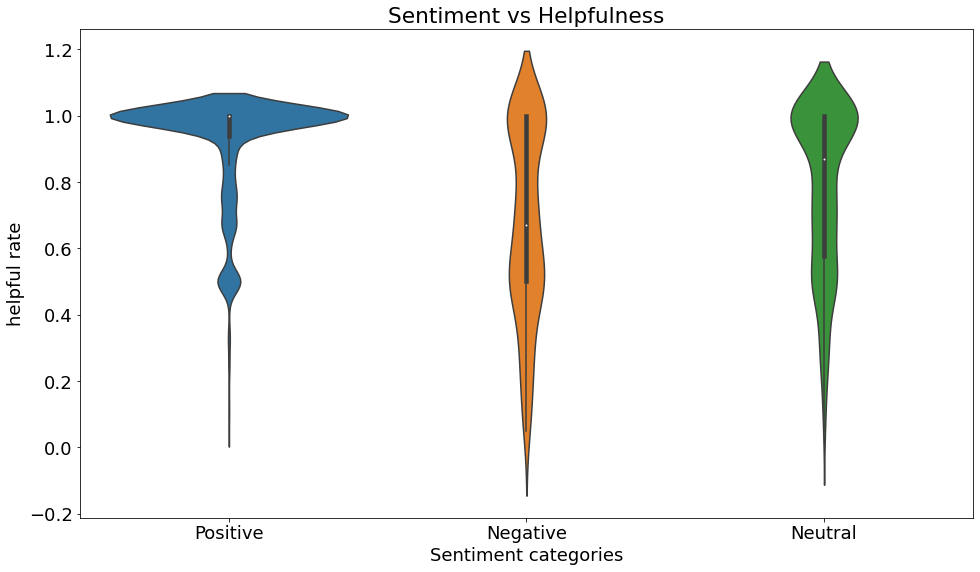

In [44]:
#plot layout
plt.rcParams.update({'font.size': 18})
rcParams['figure.figsize'] = 16,9

#removing 0 helpfulrate records

senti_new = pd.DataFrame(reviews3,columns=['Sentiment','helpful_rate'])

senti_new = senti_new[senti_new['helpful_rate']!=0.0]

#Plotting phase
sns.violinplot( x=senti_new["Sentiment"], y=senti_new["helpful_rate"])
plt.title('Sentiment vs Helpfulness')
plt.xlabel('Sentiment categories')
plt.ylabel('helpful rate')
plt.show()

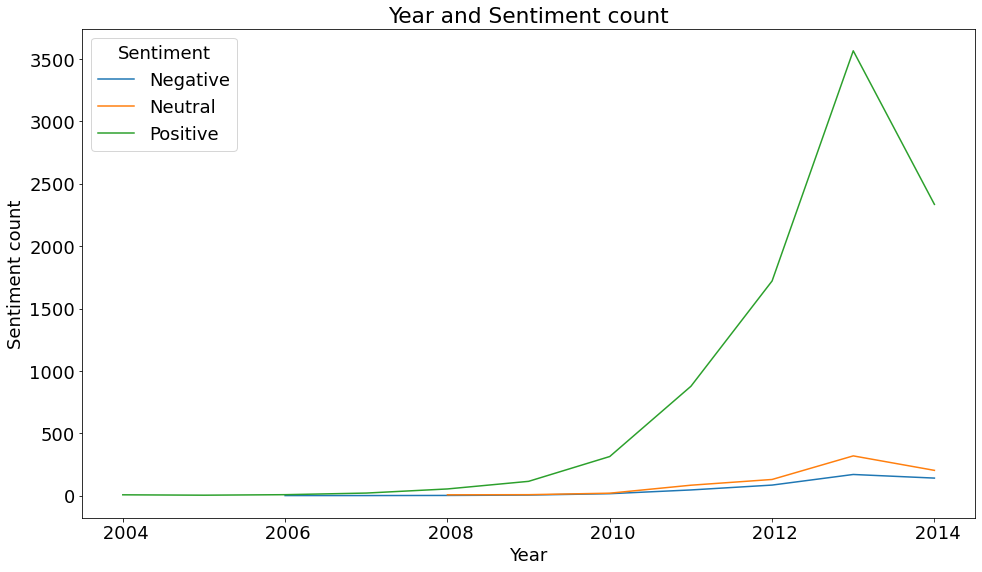

In [45]:
reviews3.groupby(['year','Sentiment'])['Sentiment'].count().unstack().plot(legend=True)
plt.title('Year and Sentiment count')
plt.xlabel('Year')
plt.ylabel('Sentiment count')
plt.show()

The sentiment function of textblob returns two properties, polarity, and subjectivity.

Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].

Review length: length of the review which includes each letters and spaces

Word length: This measures how many words are there in review


In [46]:
reviews3['polarity'] = reviews3['reviews'].map(lambda text : TextBlob(text).sentiment.polarity)
reviews3['review_len'] = reviews3['reviews'].astype(str).apply(len)
reviews3['word_count'] = reviews3['reviews'].apply(lambda x : len(str(x).split()))

In [47]:
reviews3

reviewerID        asin  overall  \
0      A2IBPI20UZIR0U  1384719342      5.0   
1      A14VAT5EAX3D9S  1384719342      5.0   
2      A195EZSQDW3E21  1384719342      5.0   
3      A2C00NNG1ZQQG2  1384719342      5.0   
4       A94QU4C90B1AX  1384719342      5.0   
...               ...         ...      ...   
10256  A14B2YH83ZXMPP  B00JBIVXGC      5.0   
10257   A1RPTVW5VEOSI  B00JBIVXGC      5.0   
10258   AWCJ12KBO5VII  B00JBIVXGC      4.0   
10259  A2Z7S8B5U4PAKJ  B00JBIVXGC      4.0   
10260  A2WA8TDCTGUADI  B00JBIVXGC      4.0   

                                                 reviews Sentiment   year  \
0      not much write but exactly supposed filters po...  Positive   2014   
1      product exactly quite affordablei not realized...  Positive   2013   
2      primary job device block breath would otherwis...  Positive   2013   
3      nice windscreen protects mxl mic prevents pops...  Positive   2014   
4      pop filter great looks performs like studio fi...  Positive   2014   
...                                                  ...       ...    ...   
10256                 great expected thank allfive stars  Positive   2014   
10257  ive thinking trying nanoweb strings but bit pu...  Positive   2014   
10258  tried coated strings past including elixirs ne...  Positive   2014   
10259  well made elixir developed taylor guitars stri...  Positive   2014   
10260  strings really quite good but wouldnt call per...  Positive   2014   

      month day  helpful_rate  polarity  review_len  word_count  
0        02  28          0.00  0.250000         162          25  
1        03  16          0.93  0.014286         356          55  
2        08  28          1.00  0.167500         315          48  
3        02  14          0.00  0.333333         169          22  
4        02  21          0.00  0.800000         136          21  
...     ...  ..           ...       ...         ...         ...  
10256    07  20          0.00  0.350000          34           5  
10257    07   2          0.00  0.183678        1870         291  
10258    07  22          0.00  0.316484         371          58  
10259    07   1          0.00  0.110938         981         153  
10260    07  16          0.00  0.384375         419          61  

[10261 rows x 12 columns]

Text(0.5, 0, 'polarity')

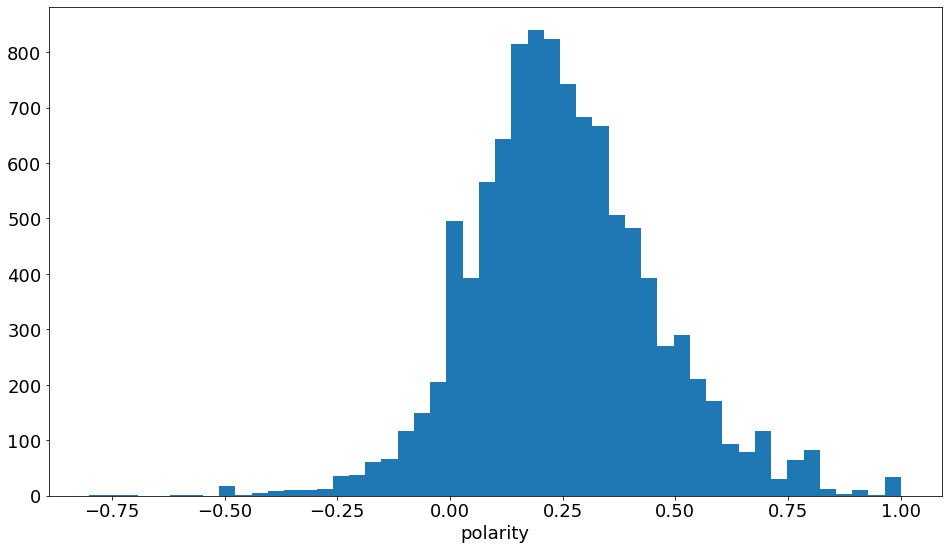

In [48]:
plt.hist(reviews3['polarity'],bins=50)
plt.xlabel('polarity')

There are more positive polarity (positive reviews) when compared to negatives and the distribution is normal.

(array([ 217.,    0.,  250.,    0.,    0.,  772.,    0., 2084.,    0.,
        6938.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

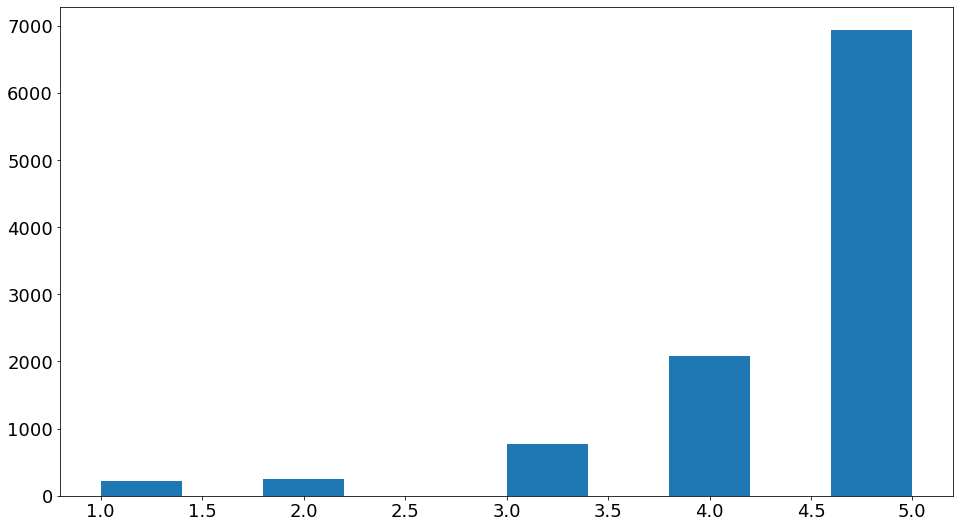

In [49]:
plt.hist(reviews3['overall'])

(array([4.109e+03, 2.963e+03, 1.281e+03, 6.470e+02, 4.030e+02, 2.330e+02,
        1.520e+02, 1.110e+02, 9.100e+01, 6.600e+01, 4.800e+01, 3.000e+01,
        2.900e+01, 1.600e+01, 2.000e+01, 1.200e+01, 7.000e+00, 2.000e+00,
        1.000e+01, 7.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 3.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  11.  ,  161.32,  311.64,  461.96,  612.28,  762.6 ,  912.92,
        1063.24, 1213.56, 1363.88, 1514.2 , 1664.52, 1814.84, 1965.16,
        2115.48, 2265.8 , 2416.12, 2566.44, 2716.76, 2867.08, 3017.4 ,
        3167.72, 3318.04, 3468.36, 3618.68, 3769.  , 3919.32, 4069.64,
        4219.96, 4370.28, 4520.6 , 4670.92, 4821.24, 4971.56, 5121.88,
        5272.2 , 5422

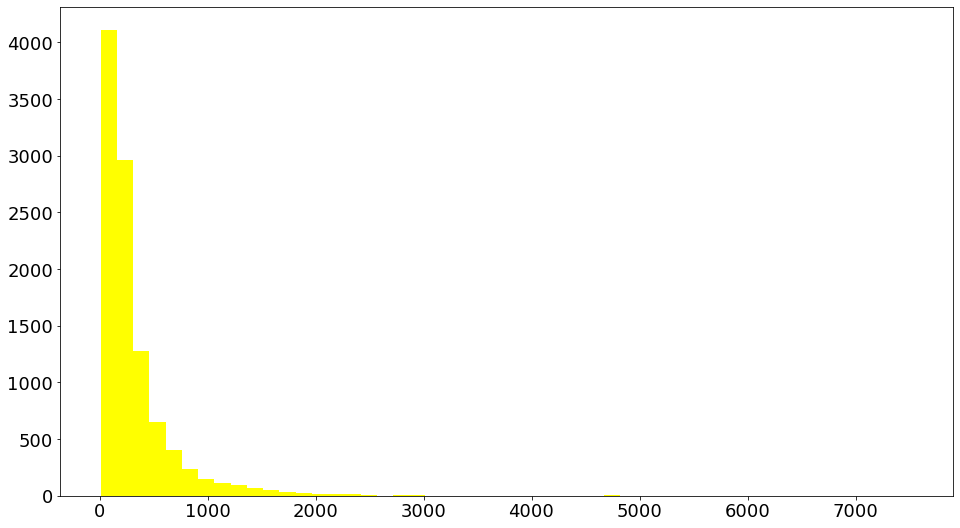

In [50]:
plt.hist(reviews3['review_len'],bins=50, color='yellow')

## ngram analysis

In [51]:
#Filtering data
review_pos = reviews3[reviews3["Sentiment"]=='Positive'].dropna()
review_neu = reviews3[reviews3["Sentiment"]=='Neutral'].dropna()
review_neg = reviews3[reviews3["Sentiment"]=='Negative'].dropna()

In [52]:
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

In [53]:
## custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

In [54]:
## Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in review_pos["reviews"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(25), 'green')

## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in review_neu["reviews"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(25), 'grey')

## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in review_neg["reviews"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(25), 'red')




# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing=0.04, horizontal_spacing=0.05,
                          subplot_titles=["Tri-gram plots of Positive reviews", 
                                          "Tri-gram plots of Neutral reviews",
                                          "Tri-gram plots of Negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=1200, paper_bgcolor='rgb(233,233,233)', title="Trigram Count Plots")
iplot(fig, filename='word-plots')

## Wordclouds

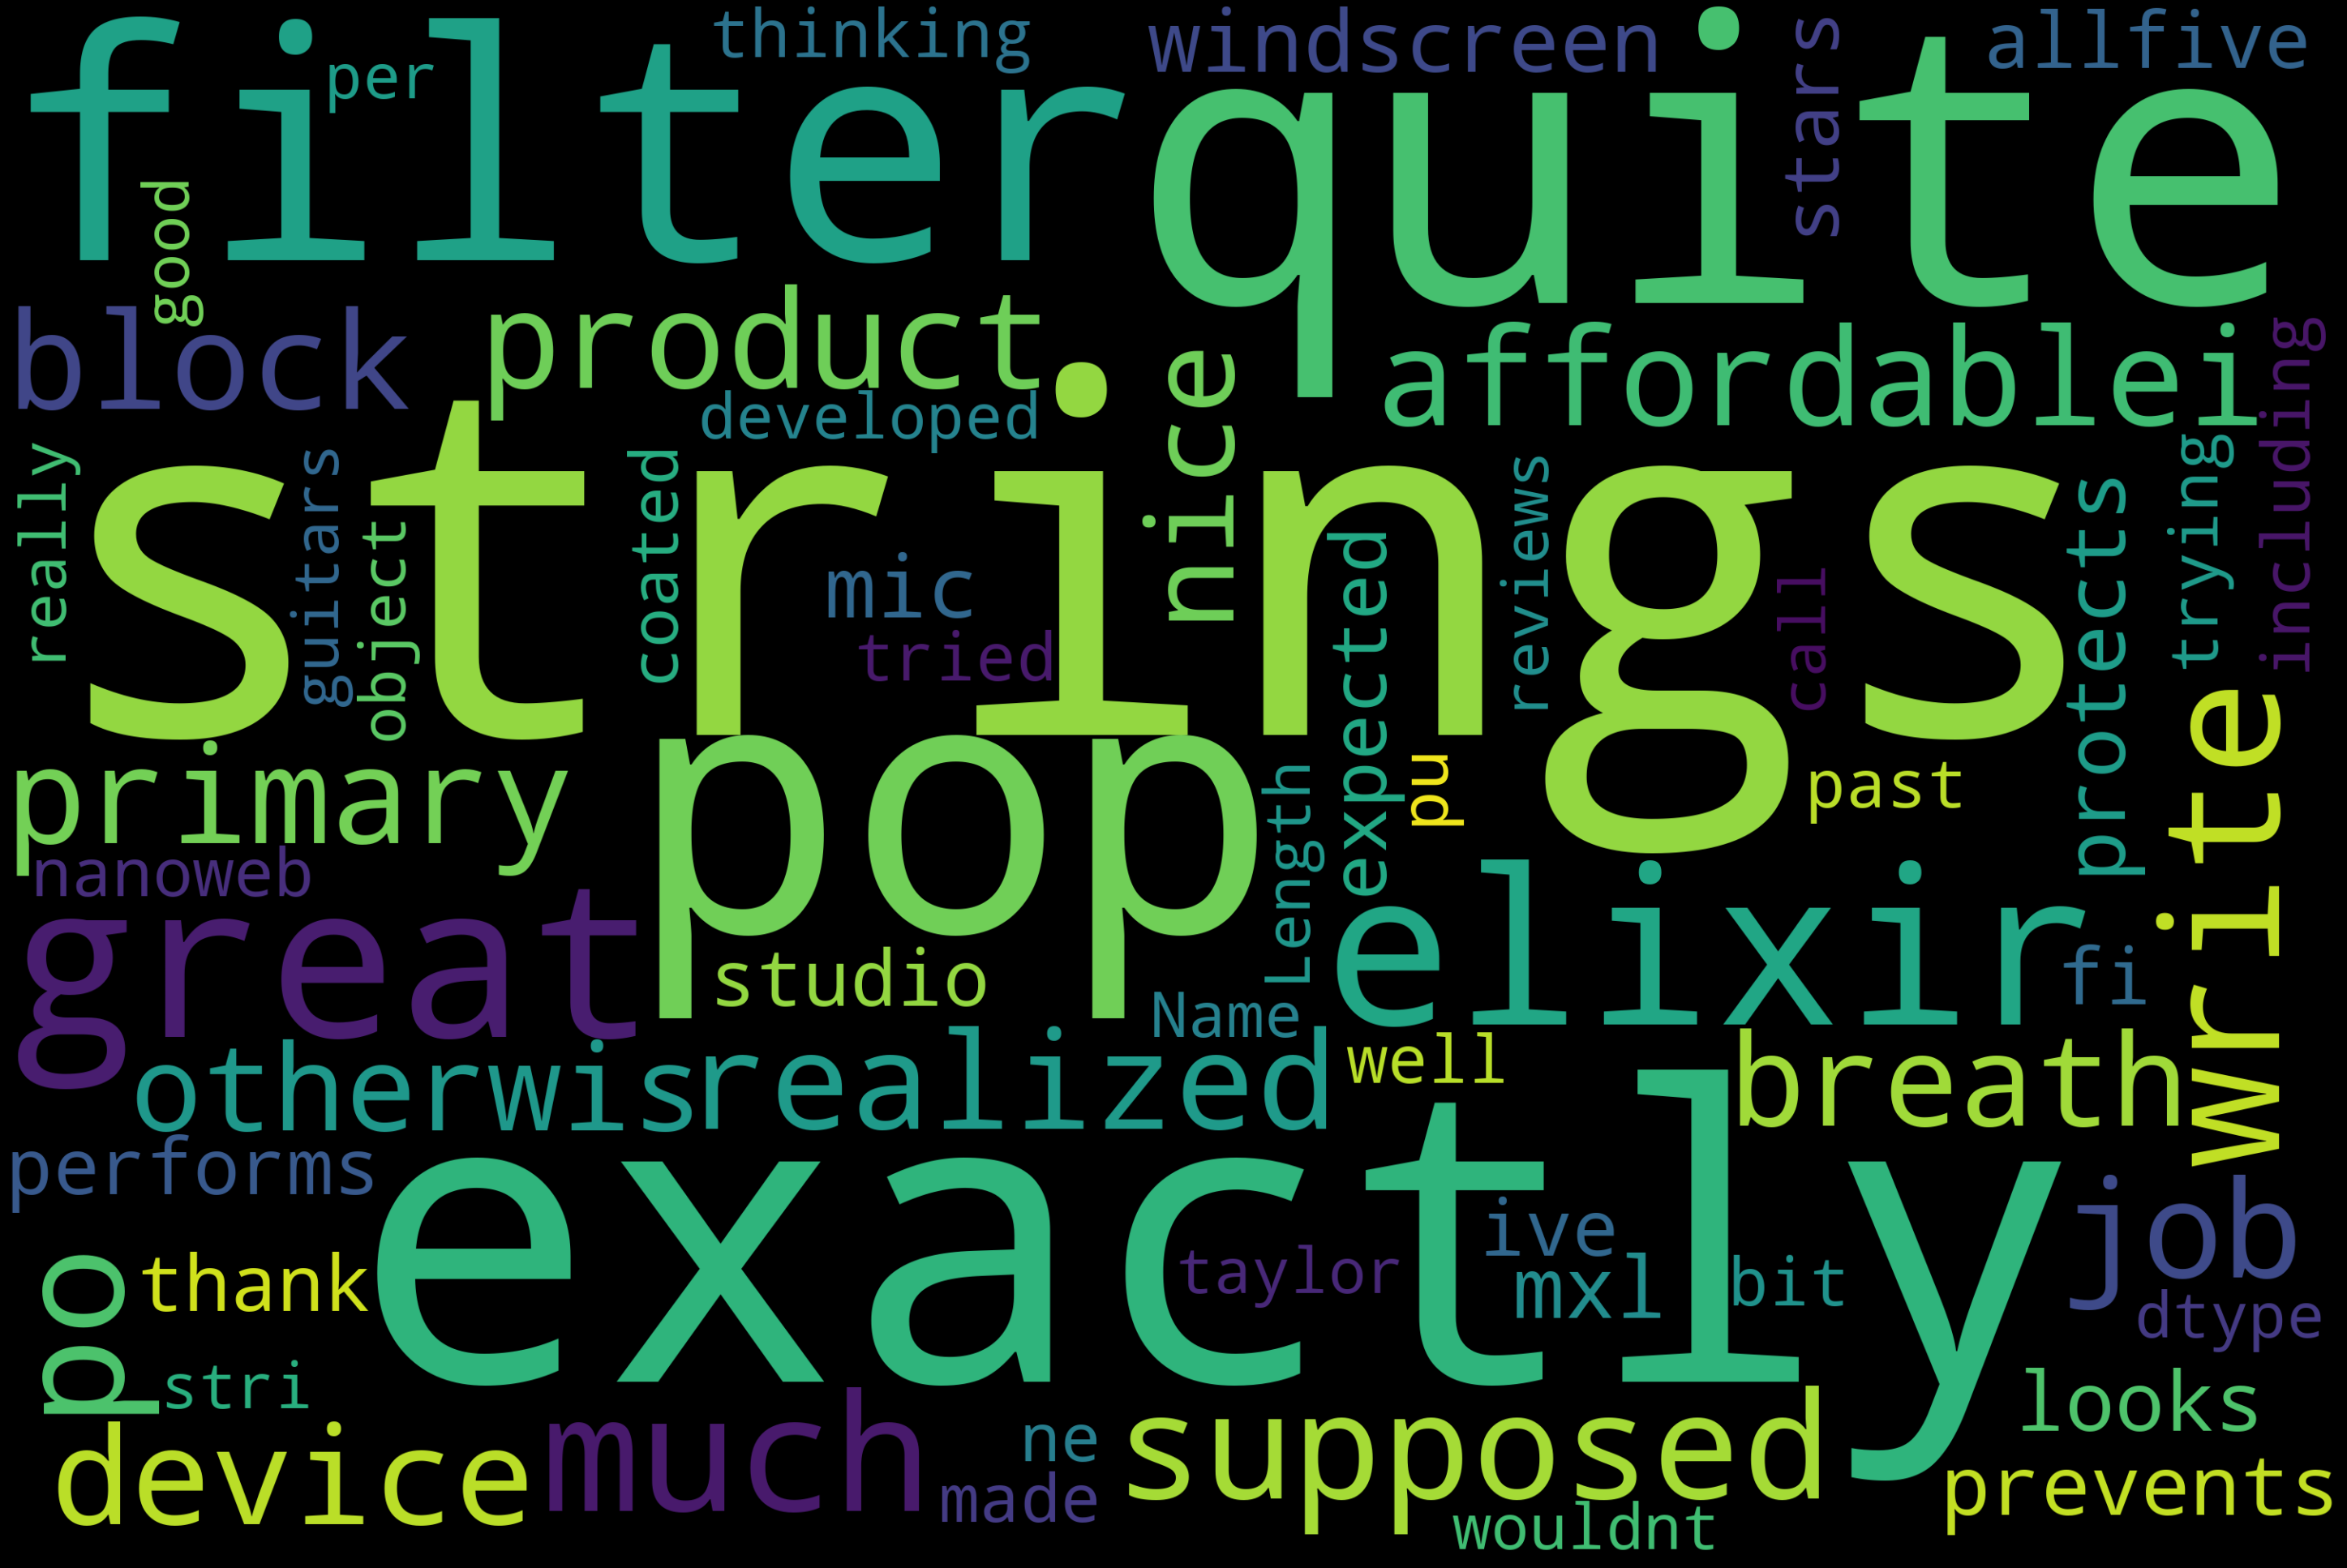

In [55]:
#for positive reviews
text = review_pos["reviews"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

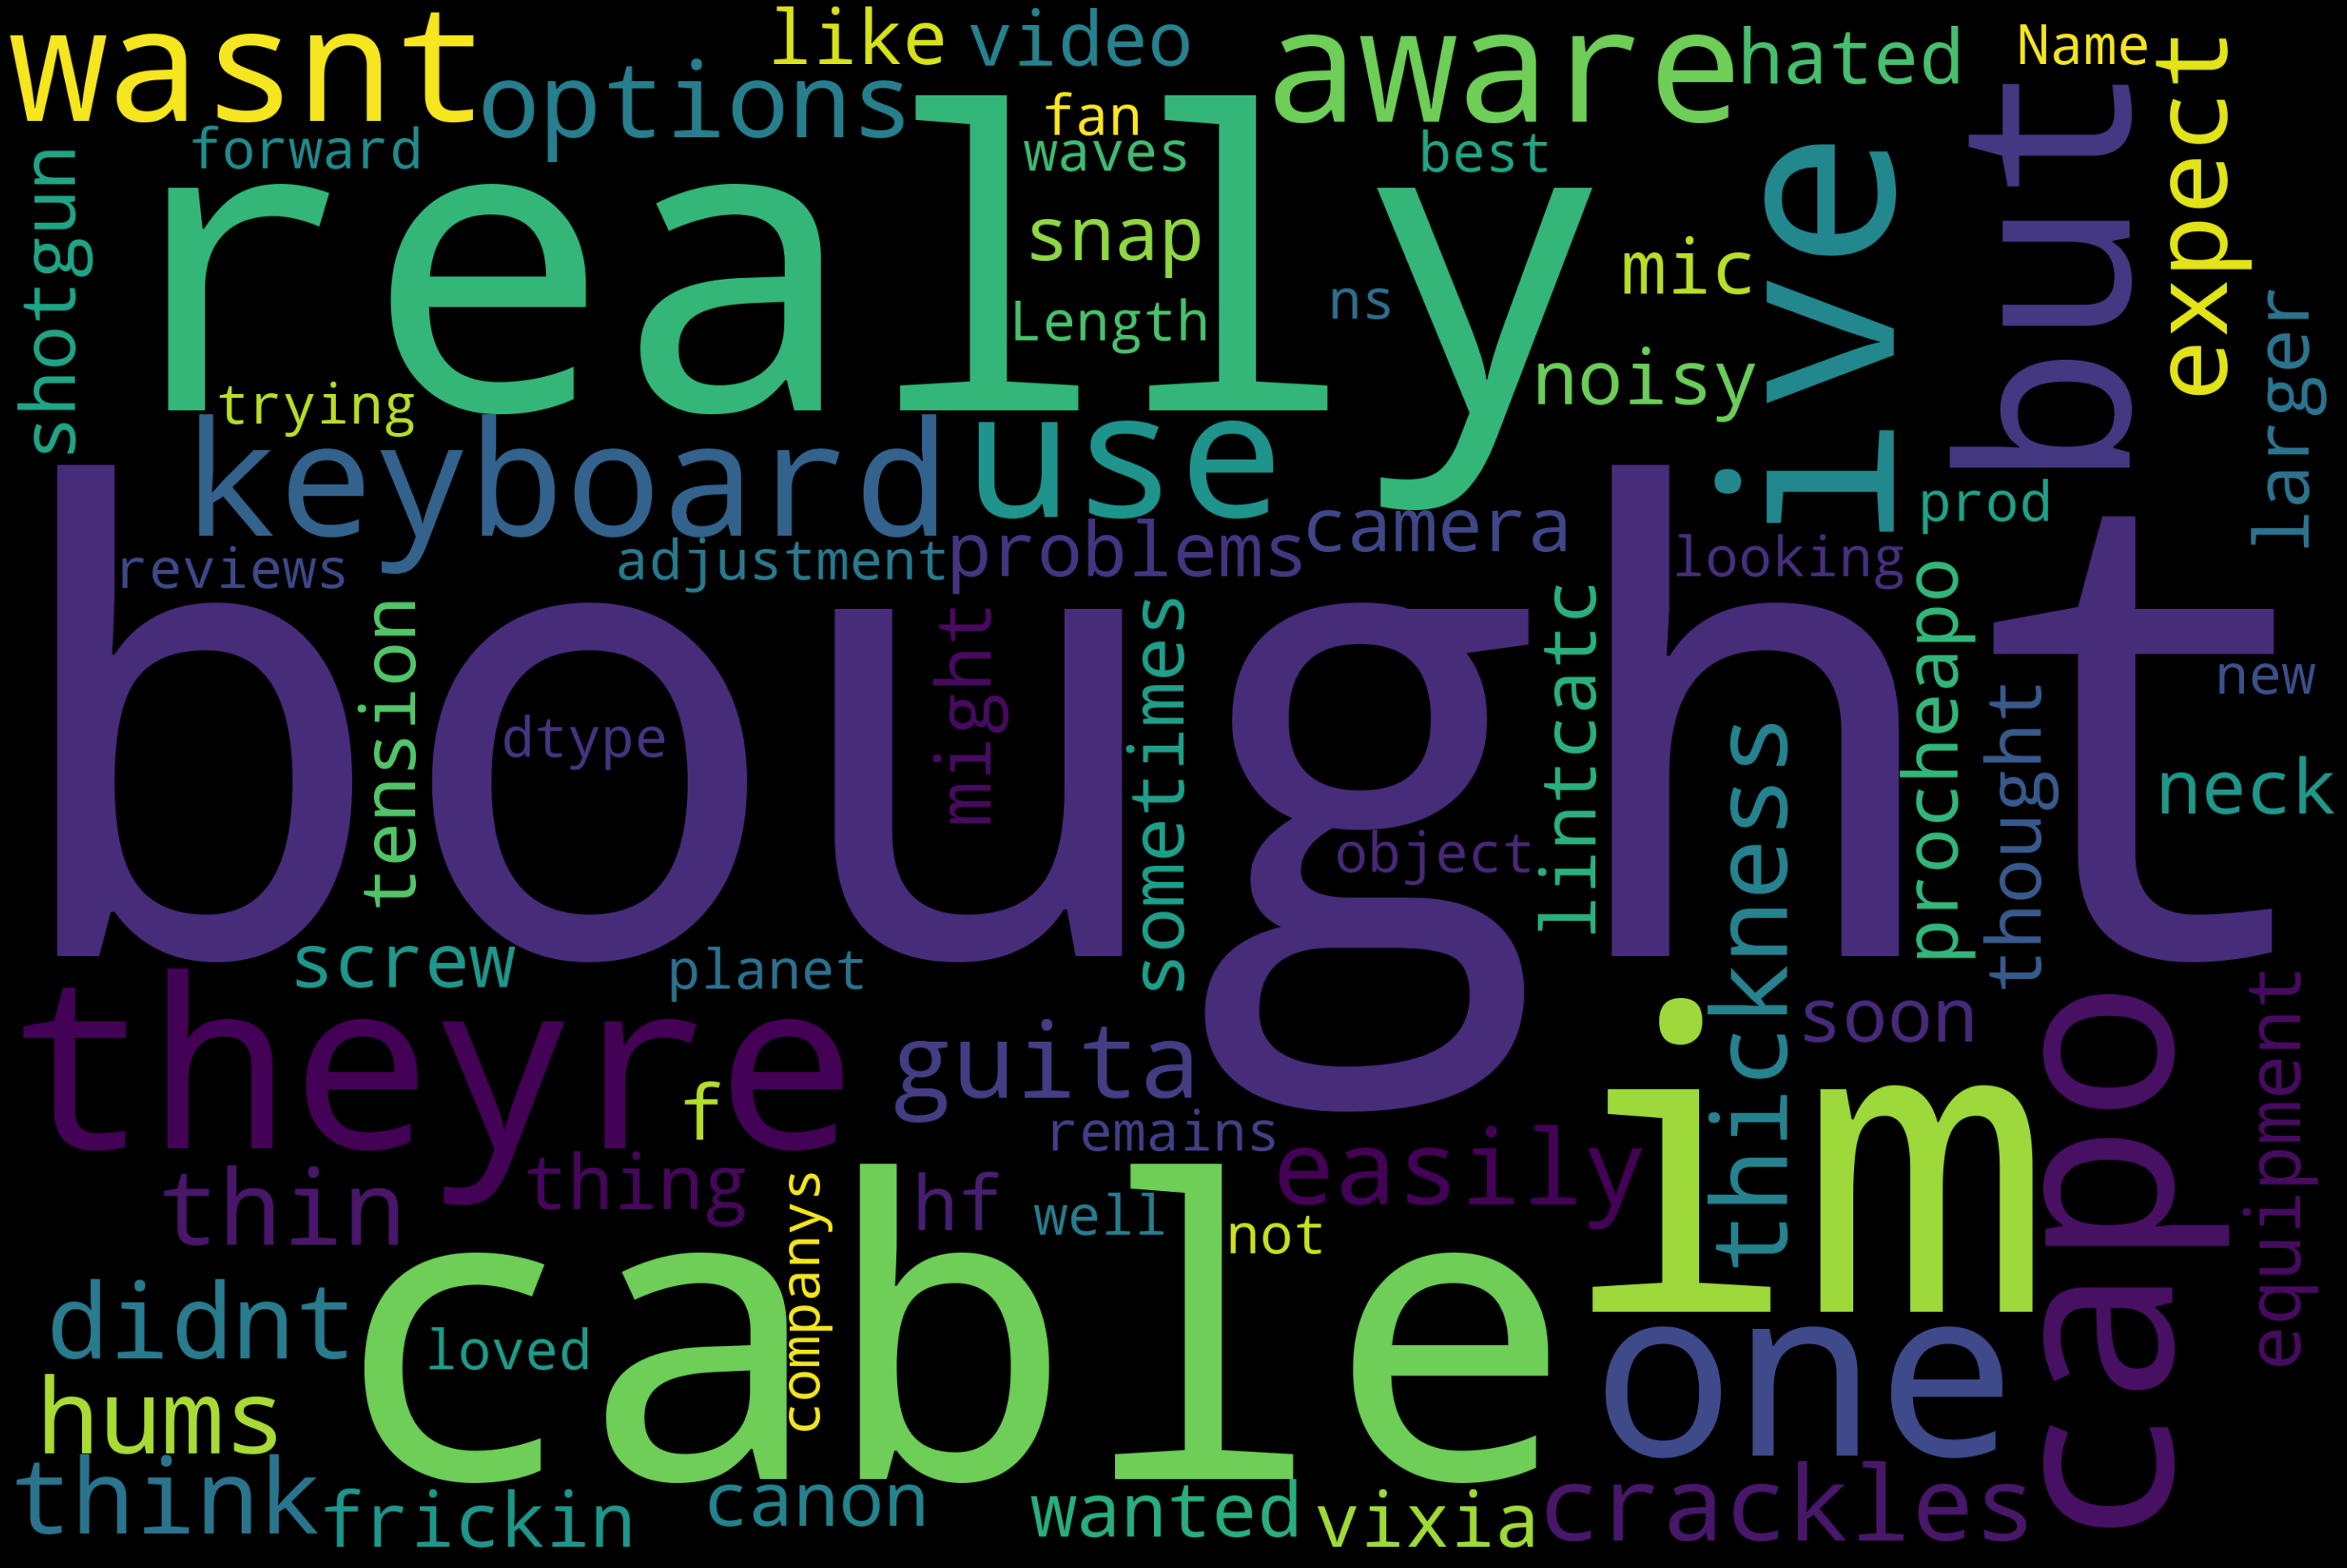

In [56]:
#for negative reviews


text = review_neg["reviews"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = stop_words).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [57]:
# calling the label encoder function
label_encoder = preprocessing.LabelEncoder() 

In [58]:
reviews3['Sentiment'] = label_encoder.fit_transform(reviews3['Sentiment'])

reviews3['Sentiment'].unique()

array([2, 1, 0])

In [59]:
reviews3['Sentiment'].value_counts()

2    9022
1     772
0     467
Name: Sentiment, dtype: int64

### Stemming



In [60]:
#Extracting 'reviews' for processing
review_features=reviews3.copy()
review_features=reviews3[['reviews']].reset_index(drop=True)
review_features.head()

reviews
0  not much write but exactly supposed filters po...
1  product exactly quite affordablei not realized...
2  primary job device block breath would otherwis...
3  nice windscreen protects mxl mic prevents pops...
4  pop filter great looks performs like studio fi...

In [61]:
#Performing stemming on the review dataframe
ps = PorterStemmer()

#splitting and adding the stemmed words except stopwords
corpus = []
for i in range(0, len(review_features)):
    review = re.sub('[^a-zA-Z]', ' ', review_features['reviews'][i])
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stop_words]
    review = ' '.join(review)
    corpus.append(review)    

In [62]:
corpus[9]

'monster make best cabl lifetim warranti doesnt hurt either isnt top line seri but work great bass guitar rig time cant go wrong monster cablesbest instrument cabl market'

In [63]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(2,2))
# TF-IDF feature matrix
X= tfidf_vectorizer.fit_transform(review_features['reviews'])

In [64]:
y=reviews3['Sentiment']

In [65]:
 !pip3 install imblearn --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org --user

In [66]:
from imblearn.over_sampling import SMOTE
from collections import Counter


In [67]:
from imblearn.over_sampling import SMOTE


print(f'Original dataset shape : {Counter(y)}')

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print(f'Resampled dataset shape {Counter(y_res)}')

Original dataset shape : Counter({2: 9022, 1: 772, 0: 467})
Resampled dataset shape Counter({2: 9022, 1: 9022, 0: 9022})


### Train-test split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=0)



In [70]:
#creating the objects
logreg_cv = LogisticRegression(random_state=0)
dt_cv=DecisionTreeClassifier()
knn_cv=KNeighborsClassifier()
svc_cv=SVC()
nb_cv=BernoulliNB()
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'SVC',4:'Naive Bayes'}
cv_models=[logreg_cv,dt_cv,knn_cv,svc_cv,nb_cv]


for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.8810059200798708
Decision Tree Test Accuracy: 0.8138589468369615
KNN Test Accuracy: 0.8689214787482609
SVC Test Accuracy: 0.8795439317757772
Naive Bayes Test Accuracy: 0.8038184420263036


In [71]:
logreg = LogisticRegression(C=10000.0, random_state=0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.94


In [79]:
from sklearn.metrics import plot_confusion_matrix

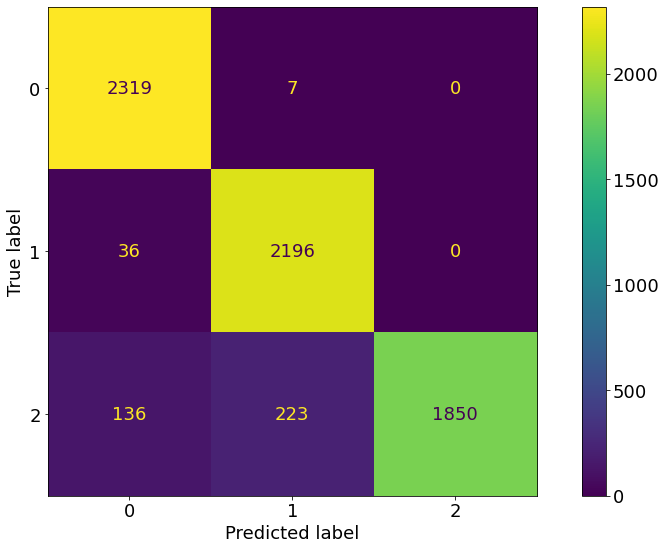

In [81]:
plot_confusion_matrix(logreg,X_test,y_test)

In [82]:
print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96      2326
           1       0.91      0.98      0.94      2232
           2       1.00      0.84      0.91      2209

    accuracy                           0.94      6767
   macro avg       0.95      0.94      0.94      6767
weighted avg       0.94      0.94      0.94      6767

